In [1]:
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)

Loading required package: ggplot2
Loading required package: data.table
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: ggthemes
Loading required package: gridExtra
Loading required package: grid
Loading required package: scales
Loading required package: RColorBrewer


In [2]:
directory = "../../../../../results/apps/pub/vms/fanout/"
blues = brewer.pal(n = 6, "Blues")[4:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), 
                                legend.position="top", 
                                legend.text=element_text(size=8),
                                axis.text.x = element_text(angle = 45, hjust = 1))

In [3]:
dishThroughputStats <- fread(paste(directory, "dish_throughput_stats.csv", sep="/"), sep=",", header=TRUE)

In [4]:
head(dishThroughputStats)

,scheme,numSubscribers,in (kbps),in (mbps),in (krps)
1,baseerat,8,81630.94,79.71771484375,200.075833333333
2,baseerat,8,80950.9,79.05361328125,198.409068627451
3,baseerat,8,80190.05,78.310595703125,196.544240196078
4,baseerat,8,76888.28,75.0862109375,188.451666666667
5,baseerat,8,81164.18,79.26189453125,198.93181372549
6,baseerat,8,77794.66,75.97134765625,190.67318627451


In [5]:
colnames(dishThroughputStats)[colnames(dishThroughputStats) == "in (kbps)"] <- "inKbps"
colnames(dishThroughputStats)[colnames(dishThroughputStats) == "in (mbps)"] <- "inMbps"
colnames(dishThroughputStats)[colnames(dishThroughputStats) == "in (krps)"] <- "inKrps"

In [6]:
dishThroughputStats$scheme[dishThroughputStats$scheme == "unicast"] <- "Unicast"
dishThroughputStats$scheme[dishThroughputStats$scheme == "baseerat"] <- "Elmo"

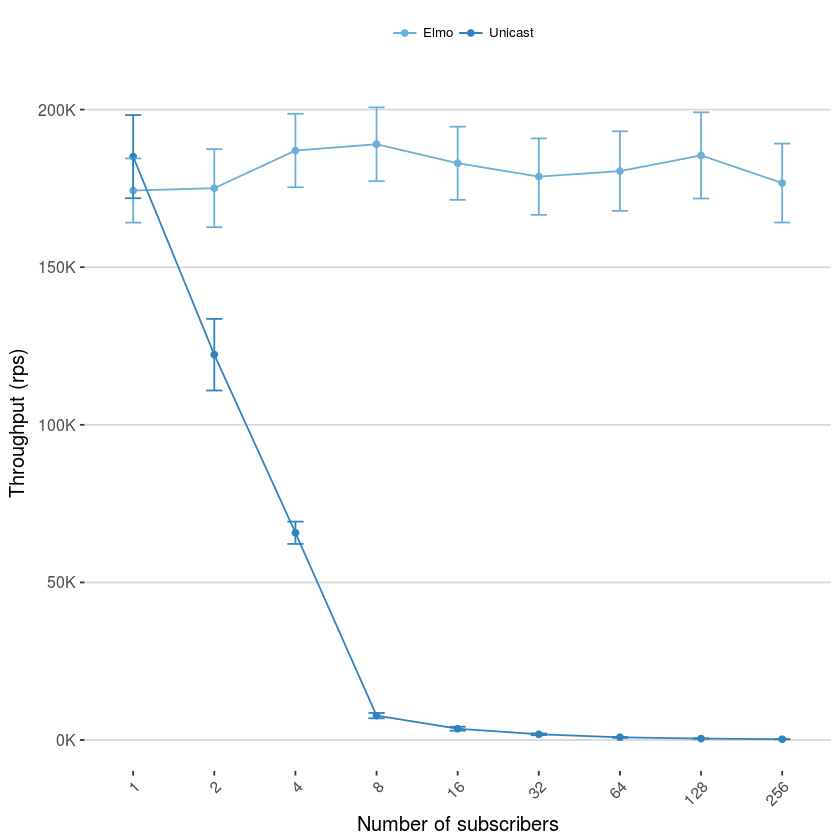

In [7]:
labeller <- function(axisLabel) {
    return(paste(axisLabel, "K", sep=""))
}

p1 <- ggplot(dishThroughputStats, aes(y=inKrps, x=factor(numSubscribers), col=scheme, fill=scheme, 
                                      group=scheme)) + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="point") + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", width=0.2) +
#  stat_summary(fun.data=mean, geom="pointrange") + 
 stat_summary(fun.y=mean, geom="line") + 
 ylab("Throughput (rps)") +
 xlab("Number of subscribers") +
 scale_color_manual(values=blues) +
 scale_fill_manual(values=blues) +
 scale_y_continuous(labels = labeller) +
 plotTheme
p1

In [8]:
dishThroughputStats[,mean(inKrps),by=list(scheme, numSubscribers)]

,scheme,numSubscribers,V1
1,Elmo,8,189.012897518382
2,Elmo,1,174.32575903799
3,Elmo,64,180.498891697304
4,Elmo,2,175.075399896801
5,Unicast,16,3.58308377896613
6,Unicast,128,0.461321301247772
7,Elmo,256,176.700280748663
8,Elmo,4,187.014982383578
9,Unicast,1,185.072554090602
10,Unicast,32,1.8177280154486


In [9]:
ggsave(p1, height=3, width=4, file="dishThroughputStats.pdf")

In [10]:
radioCPUStats <- fread(paste(directory, "radio_cpu_stats.csv", sep="/"), sep=",", header=TRUE)

In [11]:
head(radioCPUStats)

,%cpu,%mem,numSubscribers,scheme,period (ms)
1,18.3,0.1,32,unicast,1
2,19,0.1,32,unicast,1
3,19.3,0.1,32,unicast,1
4,19,0.1,32,unicast,1
5,18.3,0.1,32,unicast,1
6,18.6,0.1,32,unicast,1


In [12]:
colnames(radioCPUStats)[colnames(radioCPUStats) == "period (ms)"] <- "periodInMs"
colnames(radioCPUStats)[colnames(radioCPUStats) == "%cpu"] <- "cpuUtil"

In [13]:
radioCPUStats$scheme[radioCPUStats$scheme == "unicast"] <- "Unicast"
radioCPUStats$scheme[radioCPUStats$scheme == "baseerat"] <- "Elmo"

In [14]:
p2 <- ggplot(radioCPUStats, aes(y=cpuUtil, x=factor(numSubscribers), col=scheme, fill=scheme)) + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", position=position_dodge(0.8), 
              width=0.7, col="black") + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", width=0.3, 
              position=position_dodge(0.8), color="black") +
 ylab("CPU Utilization (%)") +
 xlab("Number of subscribers") +
 ggtitle("") +
 scale_color_manual(values=blues) +
 scale_fill_manual(values=blues) +
 plotTheme + theme(legend.key.size = unit(0.25, "cm"))

In [15]:
ggsave(p2, height=3, width=4, file="dishCPUStats.pdf")

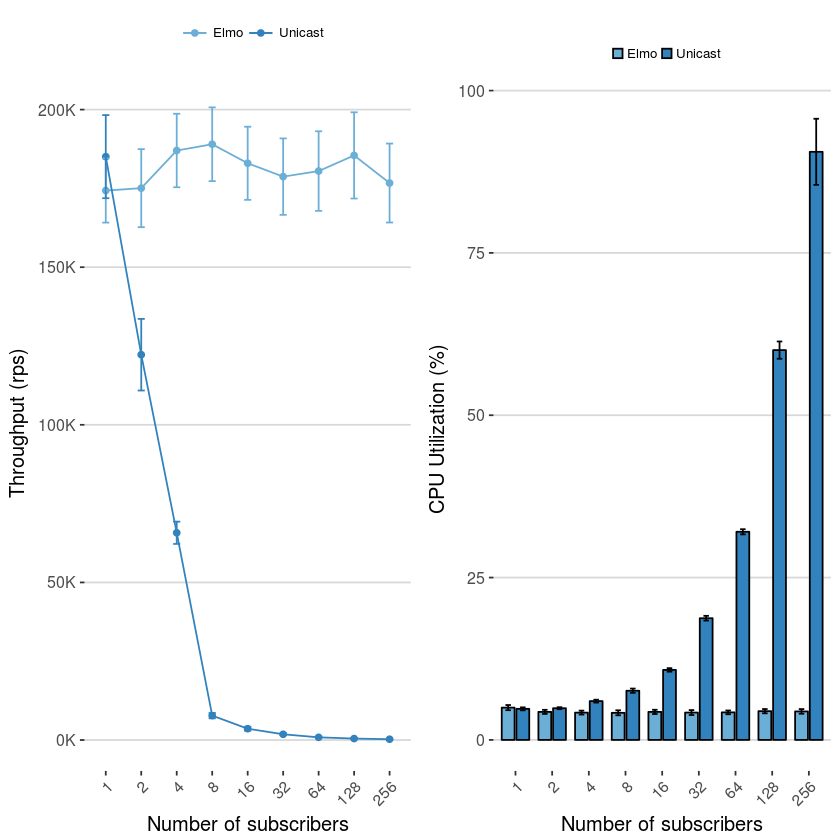

In [16]:
combined <- grid.arrange(p1, p2, ncol=2)
ggsave(combined, height=2, width=4.6, file="dishStatsAll.pdf")